In [77]:
from qiskit import *
from qiskit.circuit.library import MCXGate, RXGate, RZZGate
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator, QasmSimulator
from IPython.core.display import Latex
from qiskit.circuit import Parameter
from qiskit.circuit.library.standard_gates import RXGate, RYGate, RZGate, RZZGate
from sympy.physics.quantum import TensorProduct
from sympy import Matrix
import numpy as np

In [2]:
def adjacency_matrix(V, edges):
    # Initialize an empty V x V matrix with all zeros
    matrix = [[0] * V for _ in range(V)]
    
    # Populate the matrix based on the edges
    for edge in edges:
        u, v = edge
        matrix[u][v] = 1
        matrix[v][u] = 1  # Undirected graph
    
    return np.array(matrix)

In [94]:
'Distance Matrix'
D = np.array([[0, 2, 3, 4],
                [2, 0, 5, 6], 
                [3, 5, 0, 7], 
                [4, 6, 7, 0]])

'Number of Nodes'
V = 4
edges = [(0, 1), (1, 2), (2, 3), (3, 0)]

'Adjacency matrix'
A = adjacency_matrix(V, edges)

'Affinity matrix'
K = TensorProduct(A, D)
MCRX=RXGate(0.5).control(6, ctrl_state='000000')

In [95]:
qc = QuantumCircuit(V*V)

qc.h([i for i in range(V*V)])
for i in range(V*V):
    a = 1
    for j in range(V*V):
        if i == j:
            qc.ry(K[i][j], i)
        elif i != j and i != a:
            qc.append(RZZGate(K[i][j]), [i, a])
            a += 1
    a += 1

qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=16, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(16, 'q'), 0), Qubit(QuantumRegister(16, 'q'), 1), Qubit(QuantumRegister(16, 'q'), 2), Qubit(QuantumRegister(16, 'q'), 3), Qubit(QuantumRegister(16, 'q'), 4), Qubit(QuantumRegister(16, 'q'), 5), Qubit(QuantumRegister(16, 'q'), 6), Qubit(QuantumRegister(16, 'q'), 7), Qubit(QuantumRegister(16, 'q'), 8), Qubit(QuantumRegister(16, 'q'), 9), Qubit(QuantumRegister(16, 'q'), 10), Qubit(QuantumRegister(16, 'q'), 11), Qubit(QuantumRegister(16, 'q'), 12), Qubit(QuantumRegister(16, 'q'), 13), Qubit(QuantumRegister(16, 'q'), 14), Qubit(QuantumRegister(16, 'q'), 15)), clbits=())

In [96]:
'Function that return the ctrl qubits for constrained layer'
def ctrl_qubits(matrix, row_idx, col_idx):
        neighbors = []
        num_rows = len(matrix)
        num_cols = len(matrix[0])

        # Add neighbors from the same row
        for j in range(num_cols):
            if j != col_idx:  # Exclude the element itself
                neighbors.append(matrix[row_idx][j])

        # Add neighbors from the same column
        for i in range(num_rows):
            if i != row_idx:  # Exclude the element itself
                neighbors.append(matrix[i][col_idx])

        return neighbors
            
    
"Defining contraint layer"
def constraint_layer(): 
        matrix = np.array([i for i in range(V*V)]).reshape(V, V)
        for i in range(V):
            for j in range(V):  
                ctrl = list(ctrl_qubits(matrix, i, j))+[matrix[i][j]]
                qc.append(MCRX, ctrl)    
        qc.barrier()
constraint_layer()
qc.measure_all()

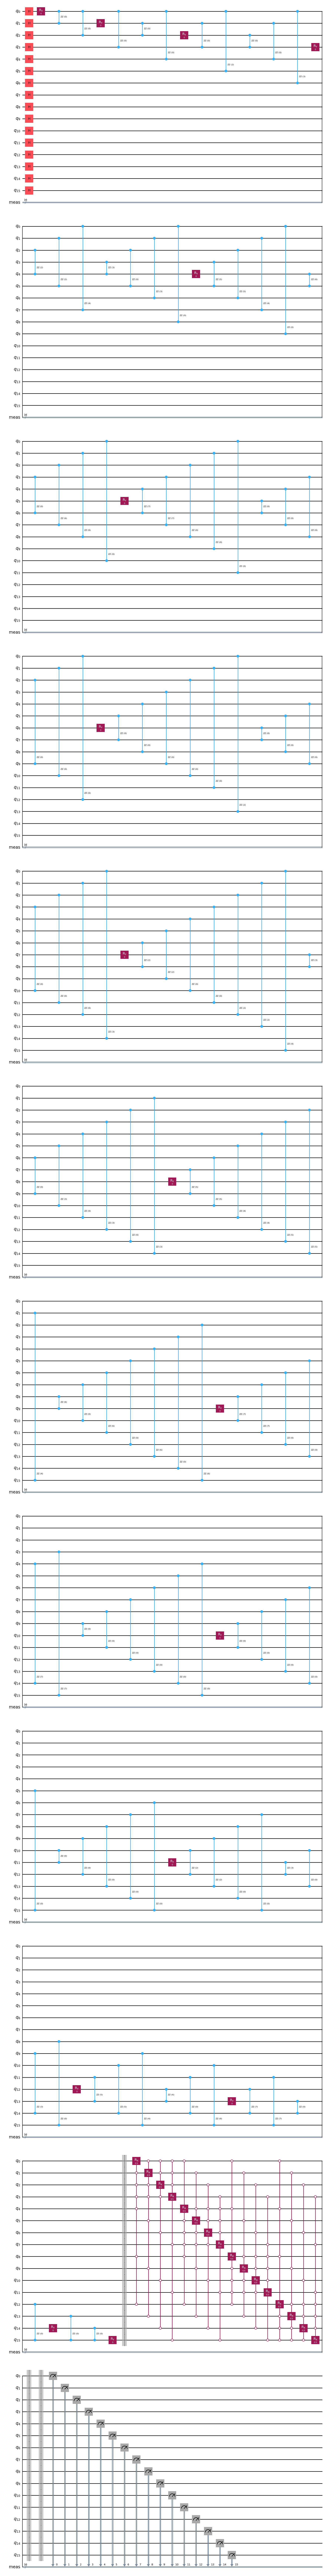

In [97]:
qc.draw('mpl')

In [102]:
simulator = Aer.get_backend('statevector_simulator')
qc1= transpile(qc, AerSimulator())
result = simulator.run(qc1).result()
sv = result.get_statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

In [12]:
!git pull origin main

Already up to date.


From https://github.com/Sajjad-Ahmad-phy/Final-Year-Project
 * branch            main       -> FETCH_HEAD


In [13]:
!git add .
!git commit -m "Your commit message"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [14]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.


Everything up-to-date
